In [79]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import seaborn as sns
from PIL import Image
! pip install wordcloud
from wordcloud import WordCloud

mpl.rcParams['figure.dpi'] = 100

df_2019_5 = pd.read_csv("listings2019-5.csv")

df_2020_1 = pd.read_csv("listings2020-1.csv")

df_2020_2 = pd.read_csv("listings2020-2.csv")

df_2020_3 = pd.read_csv("listings2020-3.csv")

df_2020_4 = pd.read_csv("listings2020-4.csv")

df_2020_5 = pd.read_csv("listings2020-5.csv")

df_2020_6 = pd.read_csv("listings2020-6.csv")

df_2020_6

df_2020_1["month"] = 1
df_2020_2["month"] = 2
df_2020_3["month"] = 3
df_2020_4["month"] = 4
df_2020_5["month"] = 5
df_2020_6["month"] = 6
df_2020_6

df2 = pd.concat([df_2020_6, df_2020_5, df_2020_4, df_2020_3, df_2020_2, df_2020_1])

df3 = df2.groupby("month")["month"].size().reset_index(name="listings")

df4 = df2.groupby(['month'])['price'].mean().reset_index(name="avgprice")

dfRPM = df2.groupby(['month'])['reviews_per_month'].mean().reset_index(name="reviewspermonth")

In [80]:
df_2020_6

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,month
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,NaN,Western Addition,37.76931,-122.43386,Entire home/apt,170,1,241,2020-03-28,1.82,1,143,6
1,5858,Creative Sanctuary,8904,Philip And Tania,NaN,Bernal Heights,37.74511,-122.42102,Entire home/apt,235,30,111,2017-08-06,0.82,1,0,6
2,7918,A Friendly Room - UCSF/USF - San Francisco,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,65,32,19,2020-03-06,0.14,9,365,6
3,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,65,32,8,2018-09-12,0.11,9,365,6
4,8339,Historic Alamo Square Victorian,24215,Rosy,NaN,Western Addition,37.77525,-122.43637,Entire home/apt,726,5,28,2019-06-28,0.21,2,365,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7809,43688753,Calhoun Terrace,91333416,Jan,NaN,North Beach,37.79976,-122.40359,Entire home/apt,25000,30,0,NaN,NaN,25,289,6
7810,43689904,Prime Russian Hill Location - Polk Street!,54810554,Elizabeth,NaN,Russian Hill,37.80128,-122.42339,Entire home/apt,239,30,0,NaN,NaN,3,365,6
7811,43698429,Wyndham Canterbury SFO 3 bdrm Presidential Suite,467283,Claudine,NaN,Downtown/Civic Center,37.78845,-122.41226,Entire home/apt,750,30,0,NaN,NaN,1,328,6
7812,43701605,Luxury High Rise Apartment with Bay and City View,44293827,Kevin,NaN,Pacific Heights,37.79270,-122.42287,Entire home/apt,125,30,0,NaN,NaN,1,108,6


# People are traveling less due to COVID-19 - but are they using Airbnb less?

The COVID-19 pandemic has had broad and far-reaching effects in every city and every industry. The pandemic really hit San Franscico in early March and the rest of United States shortly after. We would expect to see a sharp drop in Airbnb occupancy due to the pandemic as the country went into lockdown and travel was discouraged or even prohibited. The Airbnb data set does not contain data on occupancy, but it does contain a metric for "Reviews per Month." If people aren't using Airbnb as much then we would expect hosts to decide it isn't worth it and remove their listing, or perhaps decrease the price. If people are staying at Airbnbs less then they would be leaving less reviews - so that can give us a sense of if occupancy has decreased. 

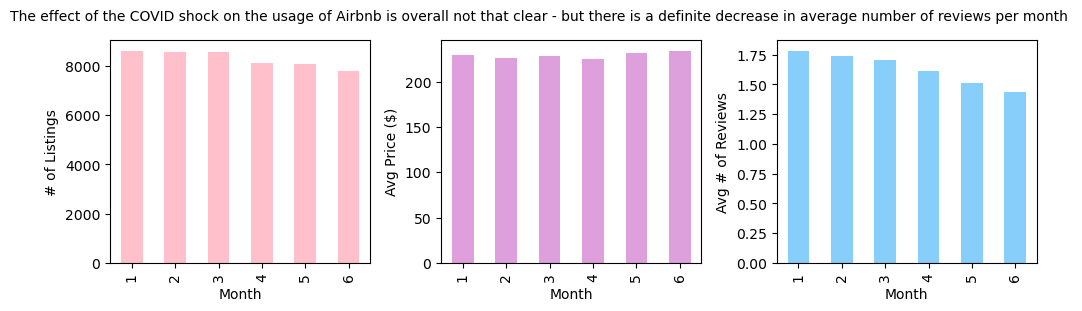

In [77]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3), constrained_layout=True)
fig.suptitle('The effect of the COVID shock on the usage of Airbnb is overall not that clear - but there is a definite decrease in average number of reviews per month ', fontsize=10)

df3.plot(x = 'month', y = 'listings', ax=ax[0], legend=None, kind= "bar", color='pink')
ax[0].set_xlabel("Month")
ax[0].set_ylabel("# of Listings")

df4.plot(x = 'month', y = 'avgprice', ax=ax[1], legend=None, kind= "bar", color='plum')
ax[1].set_xlabel("Month")
ax[1].set_ylabel("Avg Price ($)")

dfRPM.plot(x = 'month', y = 'reviewspermonth', ax=ax[2], legend=None, kind= "bar", color='lightskyblue')
ax[2].set_xlabel("Month")
ax[2].set_ylabel("Avg # of Reviews");


The number of listings has not droppped dramatically since COVID - which makes sense as hosts are likely slow to adjust to decreased demand and if they have already gone to the trouble of setting up their Airbnb there would significant losses if they just abandoned it. The average price has gone up slightly overtime - perhaps hosts are able to charge more now since only people traveling are those who really need to so they are willing to pay a higher cost. Only the reviews per month shows the decreasing trend we expected. Less people staying in a place means less reviews, so perhaps from this metric was can say there has been a slight downtown trend in Airbnb usage since the start of the pandemic. 

Another plausible hypothesis, is that people may be travelling less but have shifted to using Airbnb for other reasons such as have a larger space to quarentine in or get away from family members has they try to work from home.

# Demand for Airbnb may be unchanged - but clearly demand for long term rentals has declined

In [ ]:
fig,ax=plt.subplots(figsize=(10,10*0.618))
lp=sns.lineplot(data=pv,x=pv.index,y=2014,ax=ax)
lp=sns.lineplot(data=pv,x=pv.index,y=2015,ax=ax)
lp=sns.lineplot(data=pv,x=pv.index,y=2016,ax=ax)
lp=sns.lineplot(data=pv,x=pv.index,y=2017,ax=ax)
lp=sns.lineplot(data=pv,x=pv.index,y=2018,ax=ax)
lp=sns.lineplot(data=pv,x=pv.index,y=2019,ax=ax)
lp=sns.lineplot(data=pv,x=pv.index,y=2020,ax=ax)
ax.legend([2014,2015,2016,2017,2018,2019,2020],loc='lower right')
ax.set_xlabel('Months')
ax.set_ylabel('Average Rental prices in San Francisco in dollars')
ax.set_title('Average rent has decreased in 2020, especially when compared to past years.')

Clearly, compared to other years when rental rates either remained flat or rose such as in 2014, average monthly rents have declined in 2020. There is a clear shift in the trend of the line after March when the pandemic hit. Since rent is a large portion of most people's expenses it makes sense that as people lose work or income landlords are forced to adjust rents to accomadate. Additionally, many people fled large cities once they were able to work remote, thus decreasing demand for rentals and forcing prices down.

### below is how to make a word cloud - I just used the name column here but would be better to do with the review data maybe!

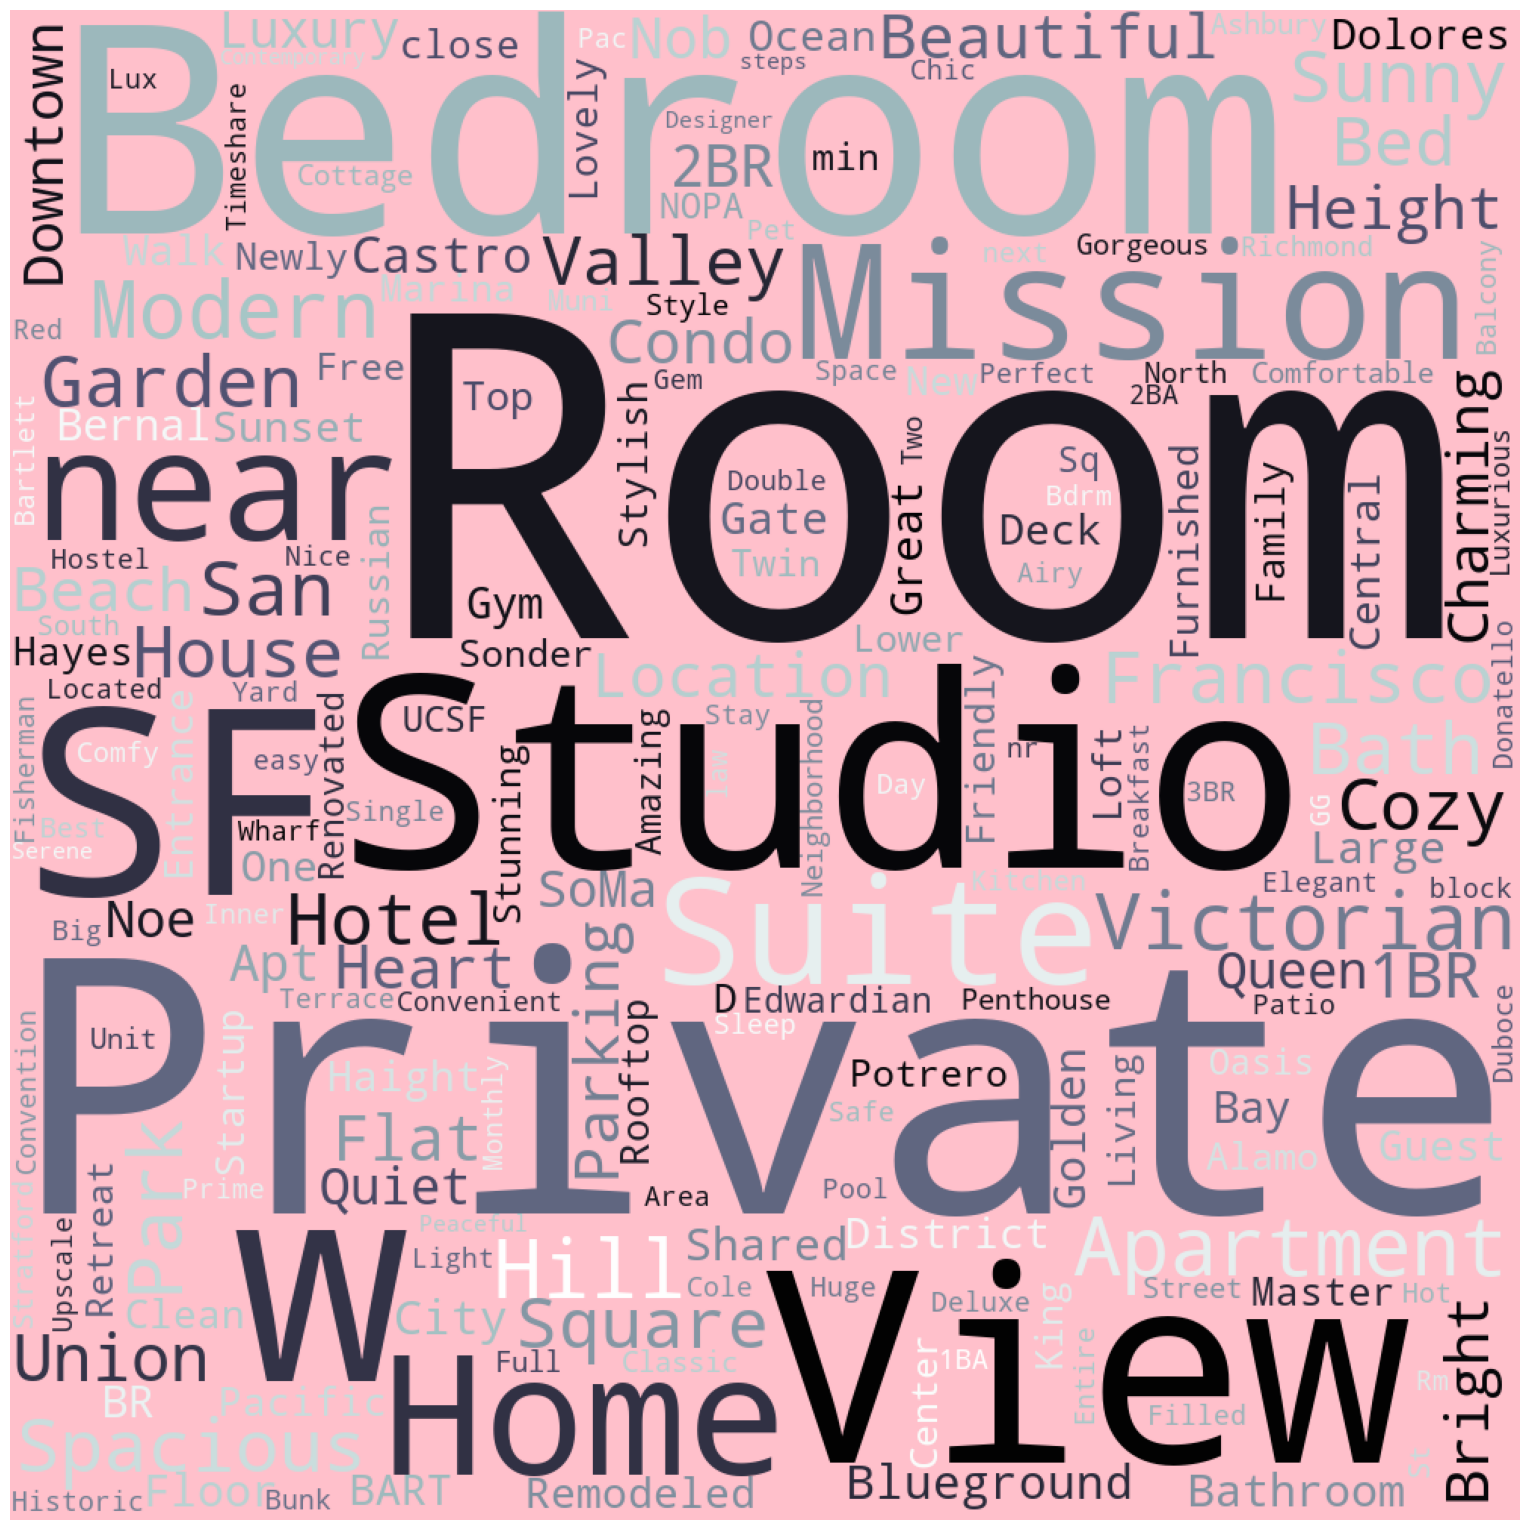

In [97]:
def pc(wordcloud):
    plt.figure(figsize=(20, 20))
    plt.imshow(wordcloud) 
    plt.axis("off");
    
wordcloud = WordCloud(width = 1000, height = 1000, random_state=1, background_color='pink', colormap='bone', collocations=False).generate(' '.join(df_2020_6['name']))
pc(wordcloud)